## Data Ingestion

In [1]:
from datetime import datetime
from datetime import date
import time
import json
import matplotlib.pyplot as plt
from pycoingecko import CoinGeckoAPI
import pandas as pd
import numpy as np
import seaborn as sns
import sandinfo as si

# pandas options
pd.options.display.float_format = '{:,.2f}'.format

# USE CAUTION/UNCOMMENT if necessary
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 30)
# pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 150)

# plotting
%matplotlib inline

# Constants:
SAND_PRICE_IN_USD = 7.23
SAND_PRICE_DATETIME = date.today()

# Initial dataframe is the top-level, need to flatten
df_initial = pd.read_json('top_wallets_and_transactions_with_USD_prices_and_tags.json')
display(df_initial.head())
print(df_initial.shape)
print(df_initial.columns)

ModuleNotFoundError: No module named 'pycoingecko'

In [2]:
def flat_sand_data():
    '''Flatten JSON object and normalize to transaction level data.'''
    with open('top_wallets_and_transactions_with_USD_prices_and_tags.json','r') as json_file:
        json_data = json.load(json_file)
        df = pd.json_normalize(
            json_data,
            record_path=["holders","transactions"],
            sep="_",
            meta=[
                     ['holders','address'],
                     ['holders','balance'],
                     ['holders','share'],
                     ['holders','tag']
            ],
            errors='ignore'
        )
        df = df.rename(
            columns={
                'type': 'tx_type',
                'from': 'address_from',
                'to': 'address_to',
                'value': 'abs_value'
            }
        )
        
        df = df.reindex(
            columns = [
                'holders_address',
                'holders_balance', 
                'holders_share',
                'holders_tag',
                'transactionHash',
                'timestamp',
                'tx_type',
                'address_from',
                'address_to',
                'abs_value',
                'USD_price_at_timestamp',
            ]
        )
        
    return df

df_flat = flat_sand_data()
df_flat.to_csv('df_flat.csv', header=True) # Useful to view DF as CSV.
df_flat


,holders_address,holders_balance,holders_share,holders_tag,transactionHash,timestamp,tx_type,address_from,address_to,abs_value,USD_price_at_timestamp
0,0x2f2456953a2cbc21fde058d33fb2ad8d59e72a35,"1,108,241,744.15",36.94,Smart Contract,0x50487f46f22f02c0bfae873f28065bd30ec9f904911f905287a1cd04a2dedbdd,1630991473,transfer,0x2f2456953a2cbc21fde058d33fb2ad8d59e72a35,0x2396c520895ddb998c48acce50a5f6de33ecc5f9,"6,000,000.00",0.87
1,0x2f2456953a2cbc21fde058d33fb2ad8d59e72a35,"1,108,241,744.15",36.94,Smart Contract,0xe1f1657df50ebb6b74f38d06570bd28ae5861efb3b19451f083fabad44a5bd3f,1630621330,transfer,0x2f2456953a2cbc21fde058d33fb2ad8d59e72a35,0x2f8c8e82185c831ea96c02edda9dfac941ac98e3,"806,182.00",1.01
2,0x2f2456953a2cbc21fde058d33fb2ad8d59e72a35,"1,108,241,744.15",36.94,Smart Contract,0x5f5c489f9255598d4422114b2a7002de8d71995c61621e47c6a15b5569fbe68a,1629307800,transfer,0x2f2456953a2cbc21fde058d33fb2ad8d59e72a35,0xac8eb5574c9c706f5293a247bdb5d667e87a0599,"1,388,889.00",0.59
3,0x2f2456953a2cbc21fde058d33fb2ad8d59e72a35,"1,108,241,744.15",36.94,Smart Contract,0x2dd8630d7cf54ea63a9adccca0d8a44d4c35fa0c01185733c59ab6f0dbdcfb29,1629264914,transfer,0x2f2456953a2cbc21fde058d33fb2ad8d59e72a35,0xdf89c888c802eafaad084e9b1d5298409888ee3f,"1,122,094.00",0.59
4,0x2f2456953a2cbc21fde058d33fb2ad8d59e72a35,"1,108,241,744.15",36.94,Smart Contract,0x80421643f22411b2322e5927636a6e600f90decc2acbda7714129caaa7095ff9,1629205903,transfer,0x2f2456953a2cbc21fde058d33fb2ad8d59e72a35,0xc34003b336899ece931075c580a2b45b8c3a4f72,"336,628.00",0.64
...,...,...,...,...,...,...,...,...,...,...,...
18134,0x50fc70265a5bf285d8644628efa5a4fb96d6b7cf,"149,945.00",0,NaN,0x00d9fe7bed060dd2dea6638328d31cf4d994d1dc7c37607975d1f40f6f4b6cec,1636064352,transfer,0x23b260bc98dcd69f9b572dad2c4823489610c19f,0x50fc70265a5bf285d8644628efa5a4fb96d6b7cf,"300,000.00",2.65
18135,0x50fc70265a5bf285d8644628efa5a4fb96d6b7cf,"149,945.00",0,NaN,0x5e13d97ae1900cf9b14986690bdf415ff7d78f5d261f6aad05e33e201f639ef2,1636041663,transfer,0x50fc70265a5bf285d8644628efa5a4fb96d6b7cf,0x28c6c06298d514db089934071355e5743bf21d60,"200,000.00",2.77
18136,0x50fc70265a5bf285d8644628efa5a4fb96d6b7cf,"149,945.00",0,NaN,0x513b666d64d5b359e998bab9923bf7267b60af53ab72705ef39384c452fb3212,1636020272,transfer,0x23b260bc98dcd69f9b572dad2c4823489610c19f,0x50fc70265a5bf285d8644628efa5a4fb96d6b7cf,"200,000.00",3.01
18137,0x50fc70265a5bf285d8644628efa5a4fb96d6b7cf,"149,945.00",0,NaN,0x2aeda1ab69628624526b5644fe4ffdae30dac120822b1b62e008900c9a94c594,1635462175,transfer,0x50fc70265a5bf285d8644628efa5a4fb96d6b7cf,0x28c6c06298d514db089934071355e5743bf21d60,"100,000.84",0.92


In [ ]:
df_flat['holders_tag'].unique()

In [ ]:
df_no_tag = df_flat[df_flat['holders_tag'].isnull()]
df_no_tag

## Most frequent From and To Wallet Addresses:

In [ ]:
display(df_no_tag['address_from'].value_counts())
display(df_no_tag['address_to'].value_counts())

In [ ]:
# df_tx takes a copy of df_flat and makes for better readability.
# Does not include tagged wallets.

df_tx = df_no_tag.copy()

df_tx['uniq_transID'] = df_tx[['holders_address','timestamp']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
df_tx['date_time'] = pd.to_datetime(df_tx['timestamp'], unit='s') # Convert from UNIX timestamp.
df_tx['value'] = np.where(df_tx['holders_address']!=df_tx['address_from'], -df_tx['abs_value'], df_tx['abs_value']) # !!!Positive values are sales, Negative values indicate purchase.
df_tx['value_in_USD'] = df_tx['value'] * df_tx['USD_price_at_timestamp'] # Cash Flow data in USD.

# df_tx = df_tx.rename(columns={'timestamp': 'date_time'})    
df_tx.to_csv('df_tx.csv', header=True) # Useful to view DF as CSV.
df_tx.columns


### Add Current Value of Balance (WIP)

In [ ]:
## [Under Construction]

for wallet in set(df_tx['holders_address']):
    df_tx.append(
        {
            'holders_address': str(wallet),
            'holders_balance': None,
            'holders_share': None,
            'transactionHash': np.NaN,
            'timestamp': SAND_PRICE_DATETIME, 
            'tx_type': 'end_value', 
            'address_from': np.NaN, 
            'address_to': np.NaN,
            'abs_value': None, 
            'USD_price_at_timestamp': SAND_PRICE_IN_USD, 
            'uniq_transID': np.NaN, 
            'date_time': SAND_PRICE_DATETIME,
            'value': None, 
            'value_in_USD': None
        }
    , ignore_index=True)

## Wallet-Level Data:

In [ ]:
# wallet_level_data (df) uses df_flat to run min method on UNIX timestamp vs date-time.

wallet_level_data = pd.DataFrame(
    df_flat[
            ["holders_address",
             "timestamp",
        ]
    ]
    .groupby(["holders_address"])
    .min(numeric_only=True)
)

wallet_level_data.insert(loc=0, column='row_num', value=np.arange(len(wallet_level_data)))
wallet_level_data['row_num'] = wallet_level_data.reset_index(inplace=True)
wallet_level_data.drop(['row_num'], axis=1, inplace=True)
wallet_level_data['uniq_transID'] = wallet_level_data[['holders_address','timestamp']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

wallet_level_data = wallet_level_data.rename(
            columns={
                'transactionHash': 'initial_tx_hash',
            }
        )

wallet_level_data = pd.merge(wallet_level_data, df_tx, on="uniq_transID",how='inner')
wallet_level_data['holding_period_days'] = (pd.Timestamp(date.today()) - wallet_level_data['date_time']).astype('timedelta64[D]')
# wallet_level_data['holding_period_days'] = (time.time() - wallet_level_data['timestamp'])/86400
wallet_level_data.drop(['holders_address_y','timestamp_y','timestamp_x'], axis=1, inplace=True)
# wallet_level_data.drop_duplicates().T          # subset=['holders_address', 'timestamp'],inplace=True)

wallet_level_data.rename(
            columns={
                'holders_address_x': 'holders_address',
                'holders_balance_x': 'holders_balance',
                'abs_value': 'inital_abs_value',
                'date_time': 'initial_dt',
                'value': 'initial_value',
                'value_in_USD': 'initial_value_in_USD'
            },
            inplace = True
        )

display(wallet_level_data)
display(wallet_level_data.columns)
wallet_level_data.to_csv('wallet_level_data.csv', header=True) # Useful to view DF as CSV.

# Sanity Checks

In [ ]:
print(df_tx.columns)

# Only pulls in transaction type: transfer.
print(f'\n\nThe type of transaction pulled:')
display(df_tx.value_counts(['tx_type']))

# Date Range, seems reasonable
print(f'\n\nThe first date of date range is:')
display(df_tx['date_time'].min())
print(f'\n\nThe last date of date range is:')
display(df_tx['date_time'].max())

# Any same to/from addresses?
print(f'\n\nWere there transactions where the tokens were transfer from one wallet to itself?')
display(df_tx.value_counts(df_tx['address_from']==df_tx['address_to']))
                       
# 18k transactions in line with Ethan's estimates.
print(f'\n\nThe total number of transactions in the dataset:')
print(f'Shape: {df_tx.shape}')


In [ ]:
# The sum of the holders_share should be less than 100%
print(f'\n\nThe sum of the holders_share is:')
total_share = df_tx[['holders_address', 'holders_share']].groupby('holders_address').max().sort_values('holders_share', ascending=False)
display(total_share['holders_share'].sum())


# The sum of the balance should be less than 100% of the total # of circulating tokens
print(f'\n\nThe sum of the holders_balance is:')
total_balance = df_tx[['holders_address', 'holders_balance']].groupby('holders_address').max().sort_values('holders_balance', ascending=False)
display(total_balance['holders_balance'].sum())


# The USD price at each date_time stamp
print(f'\n\nThe USD price at each date_time stamp:')
display(df_tx[['date_time', 'USD_price_at_timestamp']].sort_values('date_time'))


# Count NaN or empty values
print(f'\n\nThe count of NaN or empty values:')
display(df_tx.isnull().sum())


# Why were these value_in_USD NaN or empty? Some of the timestamps are in 2021
print(f'\n\nThe rows containing NaN or empty values:')
display(df_tx.loc[df_tx['value_in_USD'].isnull()])

# df_null.to_csv('export_dataframe.csv', index = False, header=True) # Useful to open DF as CSV.


## Net Cash Flow by Wallet (Deprecated)

In [ ]:
df_tx.groupby(['holders_address']).sum().sort_values('value_in_USD')


In [ ]:
df_tx.groupby(['holders_address']).sum().sort_values('value')

## Daily SAND price, market cap, and trading volume

,date,prices,market_caps,total_volumes
0,2021-08-06,0.64,"450,334,326.62","146,251,546.80"
1,2021-08-07,0.64,"448,261,151.70","136,680,300.74"
2,2021-08-08,0.64,"449,520,239.13","159,532,195.29"
3,2021-08-09,0.62,"432,429,926.36","177,557,459.38"
4,2021-08-10,0.63,"437,091,612.67","113,970,340.04"
...,...,...,...,...
113,2021-11-27,6.87,"6,292,245,119.02","3,948,099,305.43"
114,2021-11-28,6.50,"5,884,963,465.00","2,133,529,020.16"
115,2021-11-29,7.51,"6,803,491,733.88","3,800,372,599.81"
116,2021-11-30,6.96,"6,371,839,127.55","2,896,414,896.30"


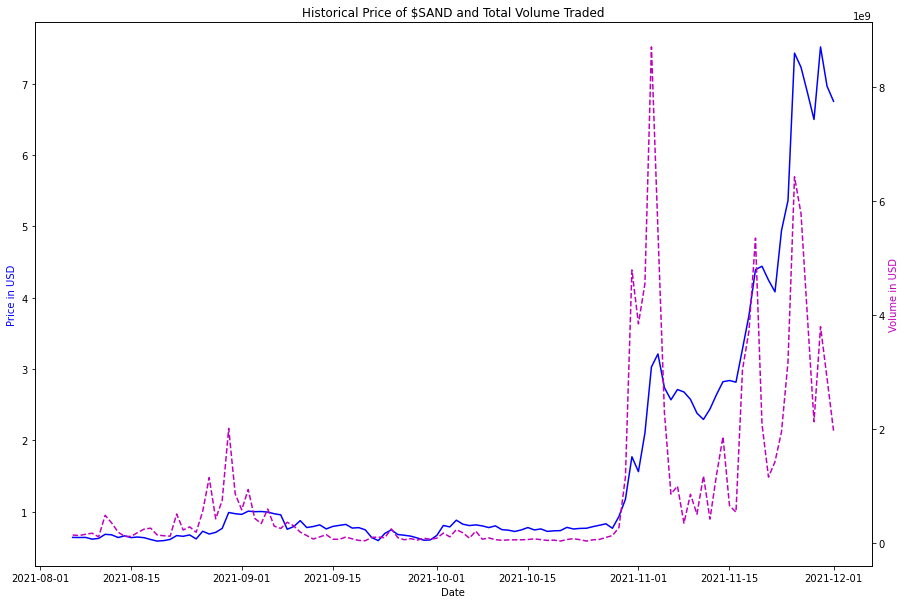

number of days in holding period: 116
start_date is: 0.6394375114850849
end_date is: 6.964094787334042
sand returns in the specified holding period is: 5.452290755042204


In [6]:
# Set a time range to get sand returns from Coin Gecko API
time_range = si.set_timeframe('2021-8-5', '2021-12-1')

# Input timeframe and pull from API. Save data in dataframe
sand_info_df = si.get_sand_returns(time_range)
display(sand_info_df)

# Graph SAND price and volume chart with a dataframe as input
si.sand_price_volume_plot(sand_info_df)

# Calculate sand_returns... STILL NEEDS TO REVISIT RETURNS FORMULA
si.sand_returns('2021-8-6','2021-11-30', sand_info_df)